In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


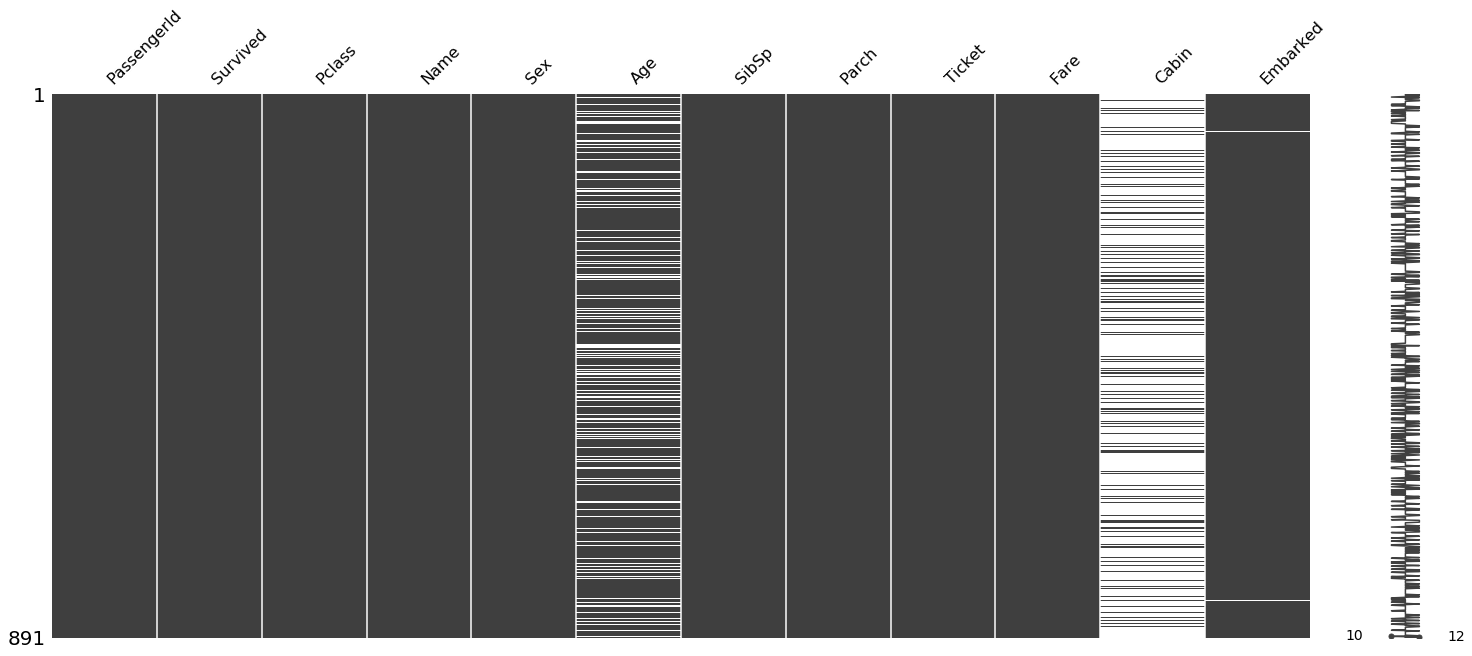

In [5]:
missingno.matrix(train)

0    549
1    342
Name: Survived, dtype: int64


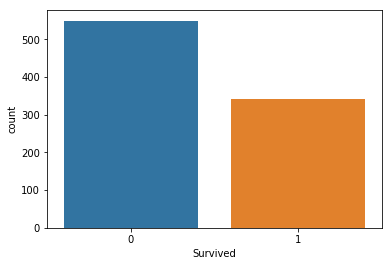

In [6]:
sns.countplot('Survived', data=train)
print(train.Survived.value_counts())

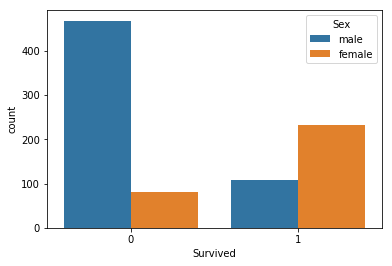

In [7]:
sns.countplot('Survived', hue='Sex', data=train)

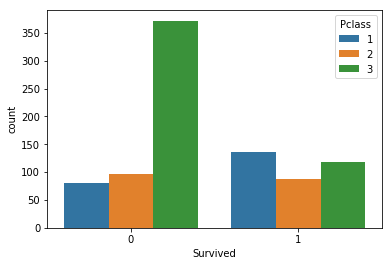

In [8]:
sns.countplot('Survived', hue='Pclass', data=train)

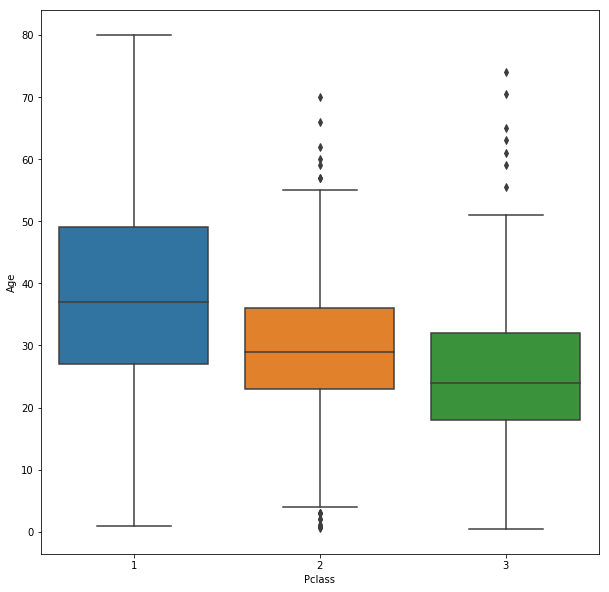

In [9]:
plt.figure(figsize = (10, 10))
sns.boxplot(x='Pclass', y='Age', data=train)

In [10]:
def fill_age_na(cols):
    age = cols[0]
    pclass = cols[1]
    if pd.isnull(age):
        if pclass == 1:
            return 37
        elif pclass == 2:
            return 29
        else:
            return 24
    else:
        return age
    
train['Age'] = train[['Age', 'Pclass']].apply(fill_age_na, axis=1)
test['Age'] = test[['Age', 'Pclass']].apply(fill_age_na, axis=1)

In [11]:
def fill_cabin_na(col):
    cabin = col[0]
    if pd.isnull(cabin):
        return 0
    else:
        return 1
    
train['Cabin'] = train[['Cabin']].apply(fill_cabin_na, axis=1)
test['Cabin'] = train[['Cabin']].apply(fill_cabin_na, axis=1)

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null int64
Embarked       889 non-null object
dtypes: float64(2), int64(6), object(4)
memory usage: 83.6+ KB


In [13]:
train_data = train
sex = pd.get_dummies(train_data['Sex'], drop_first=True)
embark = pd.get_dummies(train_data['Embarked'], drop_first=True)
train_data.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)
train_data = pd.concat([train_data, sex, embark], axis=1)

In [14]:
train_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,male,Q,S
0,1,0,3,22.0,1,0,7.2500,0,1,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,1,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,1,0,1


In [15]:
test_data = test
sex = pd.get_dummies(test_data['Sex'], drop_first=True)
embark = pd.get_dummies(test_data['Embarked'], drop_first=True)
test_data.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)
test_data = pd.concat([test_data, sex, embark], axis=1)

test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           417 non-null float64
Cabin          418 non-null int64
male           418 non-null uint8
Q              418 non-null uint8
S              418 non-null uint8
dtypes: float64(2), int64(5), uint8(3)
memory usage: 24.2 KB


In [16]:
test_data.Fare = test_data.Fare.fillna(test_data.Fare.median())

In [17]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           418 non-null float64
Cabin          418 non-null int64
male           418 non-null uint8
Q              418 non-null uint8
S              418 non-null uint8
dtypes: float64(2), int64(5), uint8(3)
memory usage: 24.2 KB


In [18]:
X = train_data.drop('Survived', axis=1)
y = train_data['Survived']

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [20]:
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression()
regressor.fit(X_train, y_train)

pred = regressor.predict(X_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, pred))

0.7937219730941704


In [21]:
from sklearn.svm import SVC
classifier1 = SVC()
classifier1.fit(X_train, y_train)

pred1 = classifier1.predict(X_test)
print(accuracy_score(y_test, pred1))

0.6233183856502242


In [22]:
from sklearn.neighbors import KNeighborsClassifier
classifier2 = KNeighborsClassifier()
classifier2.fit(X_train, y_train)

pred2 = classifier2.predict(X_test)
print(accuracy_score(y_test, pred2))

0.6143497757847534


In [23]:
from sklearn.ensemble import AdaBoostClassifier
classifier3 = AdaBoostClassifier()
classifier3.fit(X_train, y_train)

pred3 = classifier3.predict(X_test)
print(accuracy_score(y_test, pred3))

0.7937219730941704


In [24]:
pred = regressor.predict(test_data)
len(pred)

In [25]:
kaggle = pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Survived': pred})
kaggle.to_csv('titanic_pred2.csv', index=False)

ValueError: array length 223 does not match index length 418